In [1]:
using Distributions, Plots, LinearAlgebra, StatsPlots, Statistics, Optim

In [2]:
N = 1000

1000

In [3]:
f(x,y) = x^2 + y^2 ##r^2= 25
g(x,y) = (x-10)^2+(y-10)^2
h(x,y) = (x-10)^2+(y+10)^2

h (generic function with 1 method)

In [16]:
xdata = []
ydata = []
count = 0
while count < 1000
    x = rand(Uniform(-5,15))
    y = rand(Uniform(-15,15))
    if f(x,y) < 25 || g(x,y) < 25 || h(x,y) < 25
        x += rand(Normal(0,2))
        y += rand(Normal(0,2))
        push!(xdata,x)
        push!(ydata,y)
        count += 1
    end
end
        

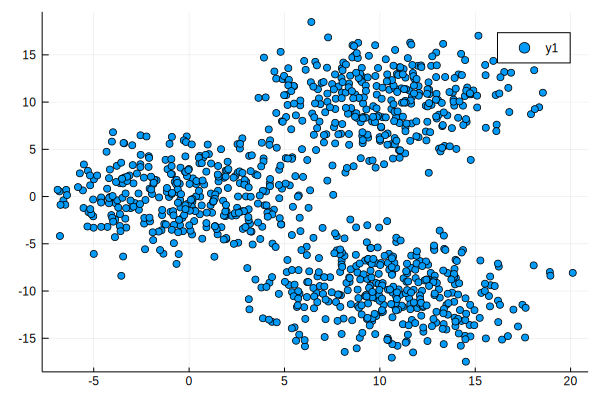

In [5]:
plt=plot(color=:red)
scatter!(xdata,ydata)


In [17]:

data = [xdata ydata]
K=6
ks = rand(1:K,N)

function plot_data(data,groups,K)
    plot()
    N = length(groups)
    A = [data groups]
    A = A[sortperm(A[:, 3]), :]
    num=1
    idx=1
    ary = []
    dim_size = size(A)[2]-1 
    while num <= K
        while idx <= N && A[idx,dim_size+1]==num
            ary = cat(ary,A[idx,1:2]', dims=1)
            idx+=1
        end
        scatter!(ary[:,1],ary[:,2], legend=false)
        ary = []
        num+=1
       
    end
    
    cent = find_cent(data, K, groups)
    for i = 1:K
        plot!([cent[i,1]], [cent[i,2]], markershape = :hexagon, markersize = 20, legend=true)
    end
    plot!()
end

plot_data (generic function with 1 method)

In [19]:
ks = cla(data,K,ks);

In [20]:
plot_data(data,ks,K)

BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [Base.Slice(Base.OneTo(0)), 2]

In [6]:


function cla(data, K, groups)

    
    cent = find_cent(data, K, groups)
    
    for i=1:N
        ks[i] = find_closest(cent,data[i,:])
    end
    
    return ks
    
end


function find_cent(data, K, groups)
    xs = zeros(K)
    ys = zeros(K)
    nums = zeros(K)
    
    for i =1:N
        gro = Integer(groups[i])
        xs[gro]+=data[i,1]
        ys[gro]+=data[i,2]
        nums[gro]+=1
    end

    for i =1:K
        xs[i]=xs[i]/nums[i]
        ys[i]=ys[i]/nums[i]
    end
    
    return [xs ys]
end

find_cent (generic function with 1 method)

In [7]:
function find_closest(A, vec)
    dis = Inf
    temp=0
    g = 1
    for i=1:size(A)[1]
        for j = 1:length(vec)
            temp += (vec[j]-A[i,j])^2
        end
        if dis > temp
            g = i
            dis = temp
        end
        temp=0
    end
    return g
end

find_closest (generic function with 1 method)

In [22]:
xdata = []
ydata = []
count = 0
while count < 10
    x = rand(Uniform(-5,15))
    y = rand(Uniform(-15,15))
    if f(x,y) < 25 || g(x,y) < 25 || h(x,y) < 25
        x += rand(Normal(0,2))
        y += rand(Normal(0,2))
        push!(xdata,x)
        push!(ydata,y)
        count += 1
    end
end
        

In [23]:
data = [[xdata[i] ydata[i]] for i in 1:length(xdata)]

10-element Array{Array{Float64,2},1}:
 [7.2630328306144465 4.237278569364336]  
 [7.391760655487061 13.642499838942706]  
 [3.4891105490314946 7.3055010521713175] 
 [10.624067603483681 -10.133125611048623]
 [-5.323150157819599 3.3971921275407833] 
 [7.335735990832087 6.6261935414400135]  
 [5.246023224078657 -5.051689402507322]  
 [4.482176695625812 9.036782024492352]   
 [14.125141388197227 -14.335963020279735]
 [14.492066631461883 -11.552801984230674]

In [51]:
min = Inf
argmin=0,0

for i in 1:length(data)
    x = i+1
    while x <= length(data)
        locmin = Inf
        locmax = 0
        for j in size(data[i])[1], k in size(data[x])[1]
            dis = (data[i][j,1]-data[x][k,1])^2+(data[i][j,2]-data[x][k,2])^2
            if dis < locmin
                locmin = dis
            end
            if dis > locmax
                locmax = dis
            end
        end
#         if locmin < min
#             min = locmin
#             argmin = i,x
#         end
        if locmax < min
            min = locmax
            argmin = i,x
        end
        x+=1
    end
end
argmin


(1, 2)

In [52]:
data = fuse(data, argmin)
# data

1-element Array{Array{Float64,2},1}:
 [5.246023224078657 -5.051689402507322; 10.624067603483681 -10.133125611048623; … ; 7.2630328306144465 4.237278569364336; 7.335735990832087 6.6261935414400135]

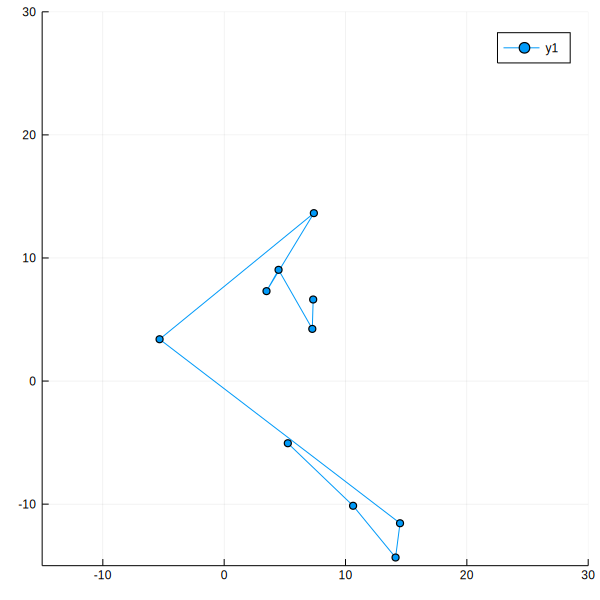

In [53]:
plot(xlim=(-15,30),ylim=(-15,30),size=(600,600))
for i in 1:length(data)
    plot!([data[i][:,1]], [data[i][:,2]], marker=:circle)
end
plot!()

In [24]:
s = []
function fuse(ary, args)
    temp = cat(ary[args[1]], ary[args[2]], dims=1)
    ary = ary[1:end .!= args[1]]
    ary = ary[1:end .!= args[2]-1]
    push!(ary,temp)
    return ary
end

fuse (generic function with 1 method)

In [ ]:
a = [1 2]
b = [2 3]
c = cat(a,b, dims=1)

In [104]:
d = [100,2,3,4,5,6,7]
d = d[1:end .!= 4]
d = d[1:end .!= 5-1]

5-element Array{Int64,1}:
 100
   2
   3
   6
   7

In [ ]:
plot()
x = [[1 2],[2 3; 5 5]]
for i=1:length(x)
    scatter!(x[i][:,1],x[i][:,2])
end
plot!()